# New-car

Intro

Import des librairies nécessaires au projet.

In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import scipy as sp
import numpy as np

## 1.Récupération des données et Prévisualisation
1. Importation des données
2. Informations sur le jeu de données
3. Prévisualisation des données (Head / Tail)

### 1.1 Importation des données

In [2]:
csv = 'csv/carData.csv'
df = pandas.read_csv(csv)
df = df.replace([np.inf, -np.inf], np.nan)

### 1.2 Information sur le jeu de données

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


On observe que le jeu de donnée ne contient pas de valeurs manquantes, elle contient 301 observations et 9 variables.
On peut également observer qu'il y a 4 variables qualitatives et 5 variables quantitatives.

Les variables qualitatives sont :
- Car_Name (Nominale)
- Fuel_Type (Nominale)
- Seller_Type (Nominale)
- Transmission (Nominale)

Les variables quantitatives sont :
- Year (Discrète)
- Selling_Price (Continue)
- Present_Price (Continue)
- Kms_Driven (Discrète)
- Owner (Discrète)

### 1.3 Prévisualisation des données (Head / Tail)

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


## 2.Exploration des données
1. Quelques statistiques de bases
2. Distribution des données (histogrammes avec matplotlib)

### 2.1 Quelques statistiques de bases (moyenne, médiane, écart-type, etc.)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


A cette étape ci, on ne constate pas d'anomalies particulières.


In [7]:
# mean
print("Moyenne prix de vente :", df['Selling_Price'].mean())
print("Moyenne prix de départ :", df['Present_Price'].mean())
print("Moyenne Kilomètrs au compteur :", df['Kms_Driven'].mean())
print("Moyenne ancien propriétaire :", df['Owner'].mean())

Moyenne prix de vente : 4.661295681063123
Moyenne prix de départ : 7.628471760797343
Moyenne Kilomètrs au compteur : 36947.20598006644
Moyenne ancien propriétaire : 0.04318936877076412


In [8]:
# median
print("Médiane prix de vente :", df['Selling_Price'].median())
print("Médiane prix de départ :", df['Present_Price'].median())
print("Médiane Kilomètrs au compteur :", df['Kms_Driven'].median())
print("Médiane ancien propriétaire :", df['Owner'].median())

Médiane prix de vente : 3.6
Médiane prix de départ : 6.4
Médiane Kilomètrs au compteur : 32000.0
Médiane ancien propriétaire : 0.0


In [9]:
# quantile
print("Quantile prix de vente :", df['Selling_Price'].quantile([0.25, 0.75]))
print("Quantile prix de départ :", df['Present_Price'].quantile([0.25, 0.75]))
print("Quantile Kilomètrs au compteur :", df['Kms_Driven'].quantile([0.25, 0.75]))
print("Quantile ancien propriétaire :", df['Owner'].quantile([0.25, 0.75]))

Quantile prix de vente : 0.25    0.9
0.75    6.0
Name: Selling_Price, dtype: float64
Quantile prix de départ : 0.25    1.2
0.75    9.9
Name: Present_Price, dtype: float64
Quantile Kilomètrs au compteur : 0.25    15000.0
0.75    48767.0
Name: Kms_Driven, dtype: float64
Quantile ancien propriétaire : 0.25    0.0
0.75    0.0
Name: Owner, dtype: float64


### 2.2 Distribution des données (histogrammes avec matplotlib)

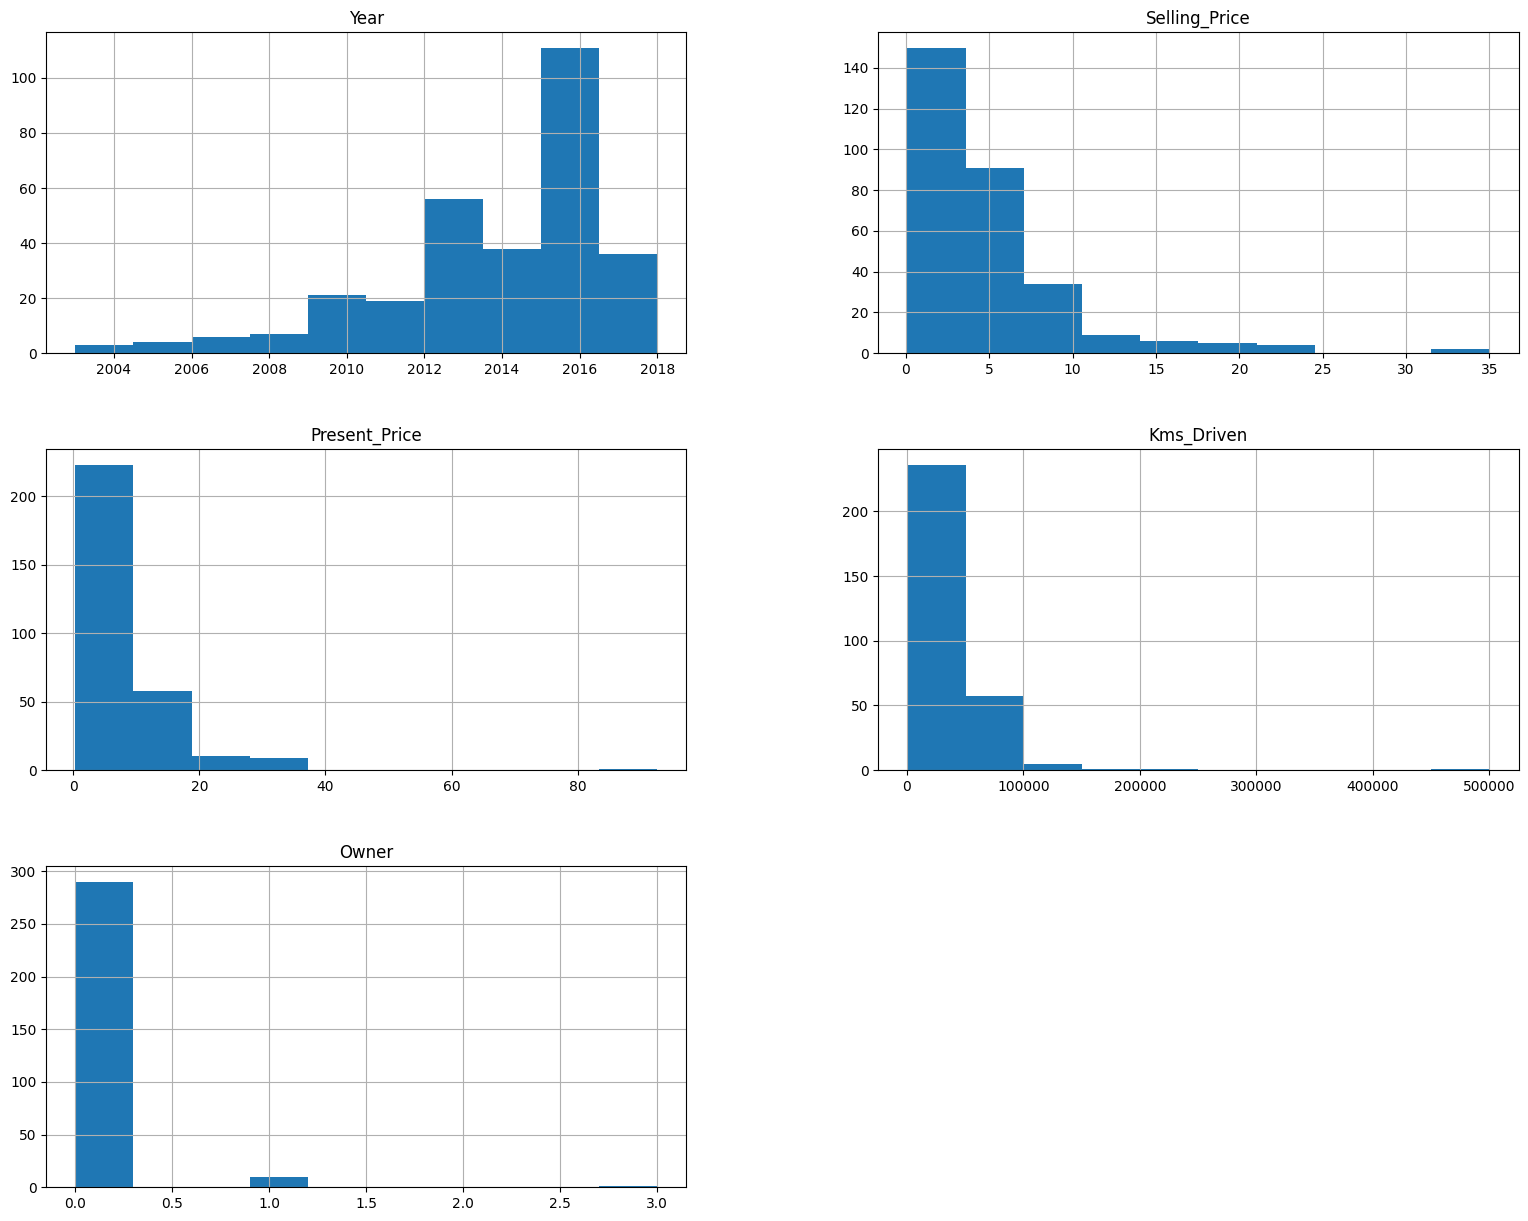

In [10]:
# hist size 15, 15 using plt
df.hist(figsize=(19, 15))
plt.show()

# 3.Seaborn & Catplot

<Figure size 640x480 with 0 Axes>

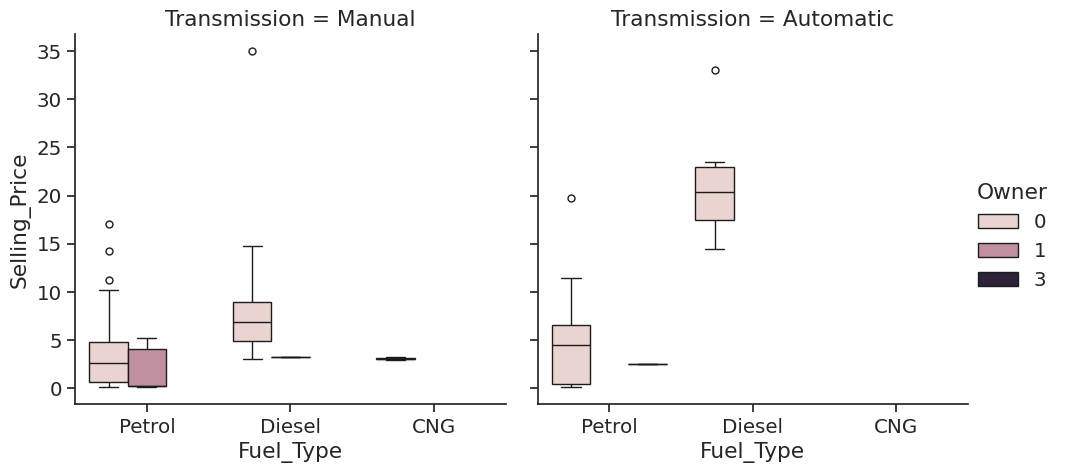

In [11]:
sns.set(style="ticks", font_scale=1.3)
sns.despine(offset=10, trim=True)
sns.catplot(data=df, y="Selling_Price", x="Fuel_Type", hue="Owner", col="Transmission", kind="box")
plt.show()

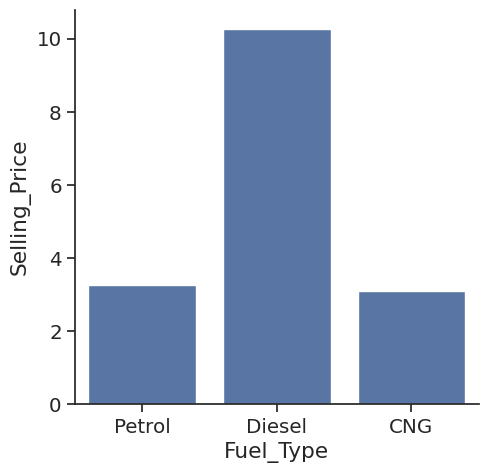

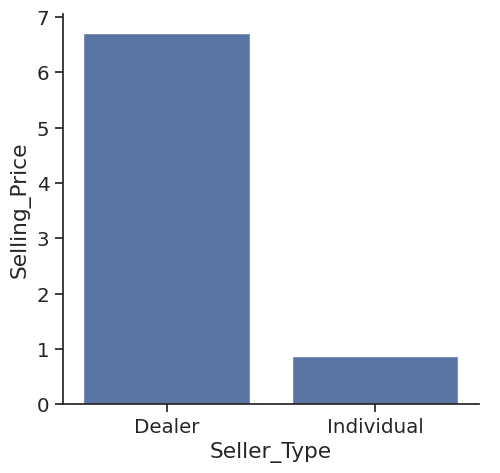

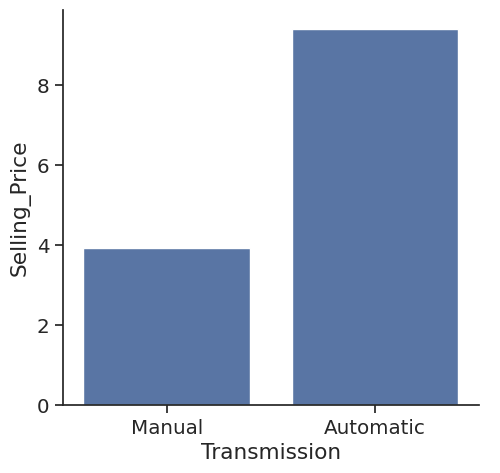

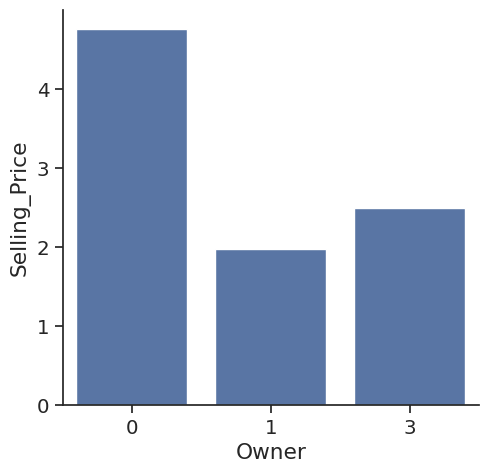

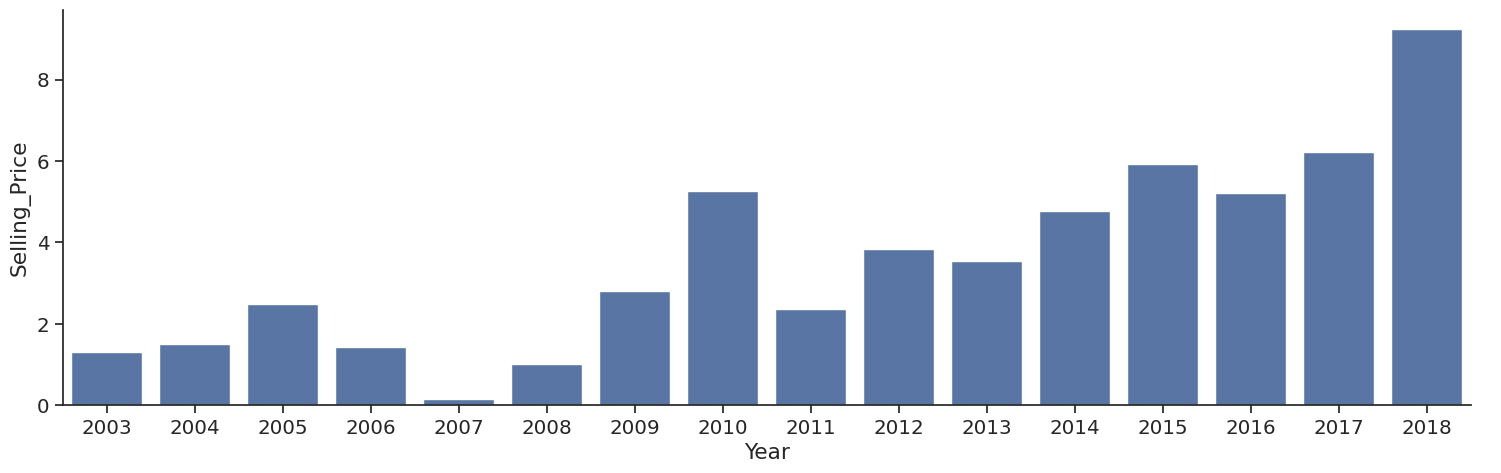

In [12]:
# CNG = Compressed Natural Gas
sns.catplot(x='Fuel_Type', y='Selling_Price', data=df, kind='bar', errorbar=None)
plt.show()

sns.catplot(x='Seller_Type', y='Selling_Price', data=df, kind='bar', errorbar=None)
plt.show()

sns.catplot(x='Transmission', y='Selling_Price', data=df, kind='bar', errorbar=None)
plt.show()

sns.catplot(x='Owner', y='Selling_Price', data=df, kind='bar', errorbar=None)
plt.show()

sns.catplot(x='Year', y='Selling_Price', data=df, kind='bar', height=5, aspect=3, errorbar=None)
plt.show()

## Utilisation de la methode catplot:

1. Catplot est utilisé pour tracer des graphiques et pour montrer la relation entre une variable categorielle et une variable numerique.

2. Il est utilisé pour montrer la distribution des observations dans chaque catégorie en utilisant différentes représentations graphiques (violon, boîte à moustaches, barres, ...).

3. Il permet aussi de regrouper les données en fonction d'une ou plusieurs variables catégorielles.


## Relation age / prix de vente

1. Régression linéaire:   
La *régression linéaire, le modèle linéaire* ou encore *le modèle de régression linéaire* est un *modèle de régression* qui cherche à établir une *relation linéaire* entre deux *variables quantitatives*;   
une *variable* dite *expliquée / de réponse* ou encore *variable indépendante* (**qui est expliquée par la théorie ou le modèle que l'on étudie**) habituellement noté **Y** et une ou plusieurs *variables* dites *explicatives* (**elles sont utilisé dans le but d'expliquer, de décrire ou de prédire la ou les variables dépendante(s)**) noté **X**.

    Lorsque la *dépendance* est exacte, la liaison entre les variables est dite *fonctionnelle*: pour chaque valeur de **X**, il existe une seule valeur possible de **Y**.

    Lorsque la *dépendance* n'est pas exacte, la relation que l'on suppose a priori entre les variables est approximative: c'est dans ce contexte que la régression linéaire apporte des résultats intéressants.

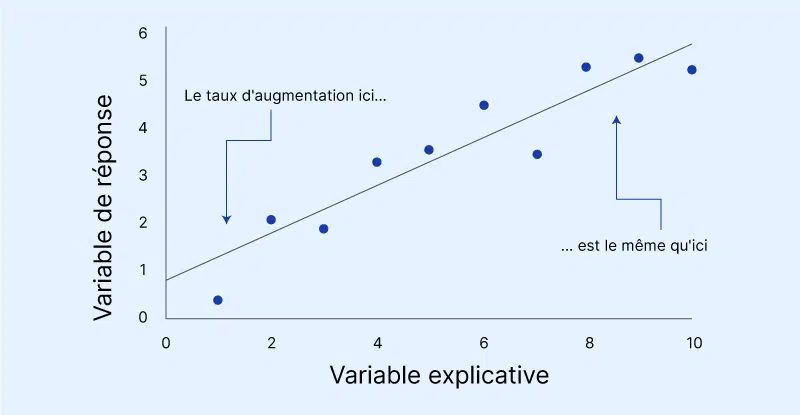

Dans le cadre de ce projet, il est fort probable qu'une relation linéaire (négative) existe entre l'âge et le prix de vente:

C'est à dire que plus l'âge d'un véhicule augmente (**variable explicative**), plus son prix diminue (**variable expliqué**)

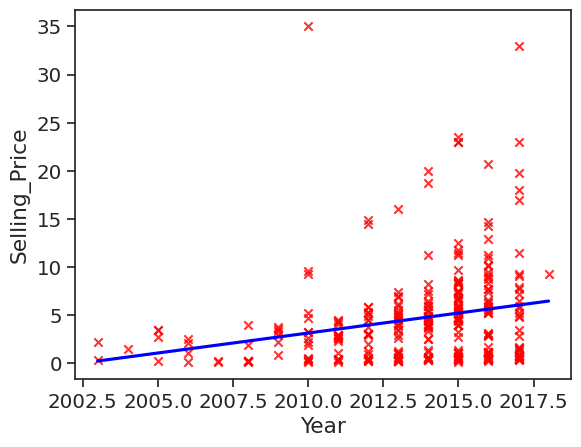

In [13]:
# linear correlation year and selling price

sns.regplot(x='Year', y='Selling_Price', data=df, marker='x', color='red', line_kws={'color': 'blue'}, ci=None)
plt.show()

## Relation Prix d'occasion / Prix neuf

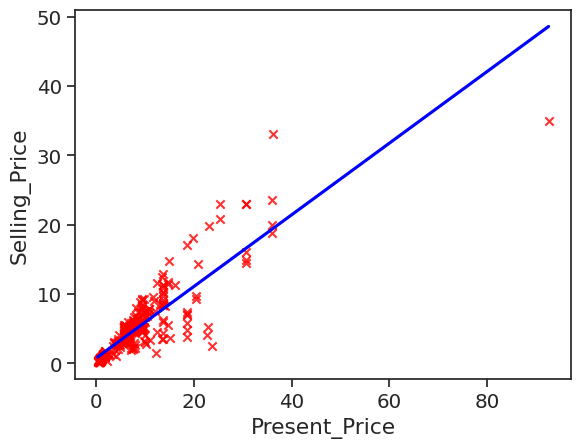

In [14]:
# linear correlation present price and selling price

sns.regplot(x='Present_Price', y='Selling_Price', data=df, marker='x', color='red', line_kws={'color': 'blue'}, ci=None)
plt.show()

## Relation Année / Prix d'occasion

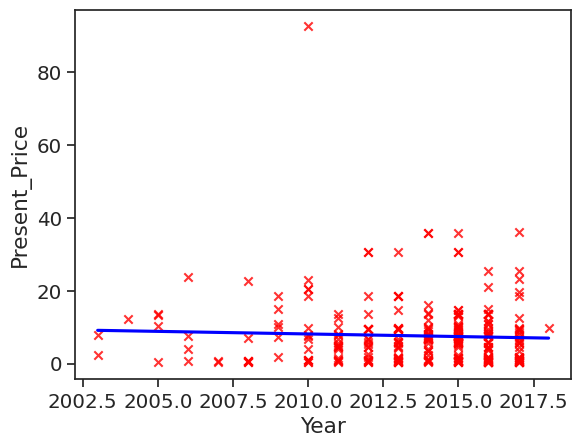

In [15]:
# linear correlation year and present price

sns.regplot(x='Year', y='Present_Price', data=df, marker='x', color='red', line_kws={'color': 'blue'}, ci=None)
plt.show()

## Relation Année / Kilométrage

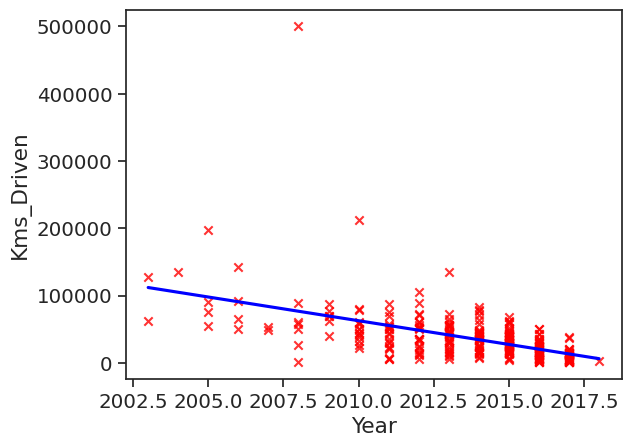

In [16]:
# linear correlation year and kms driven

sns.regplot(x='Year', y='Kms_Driven', data=df, marker='x', color='red', line_kws={'color': 'blue'}, ci=None)
plt.show()

## Relation Prix d'occasion / Kilométrage

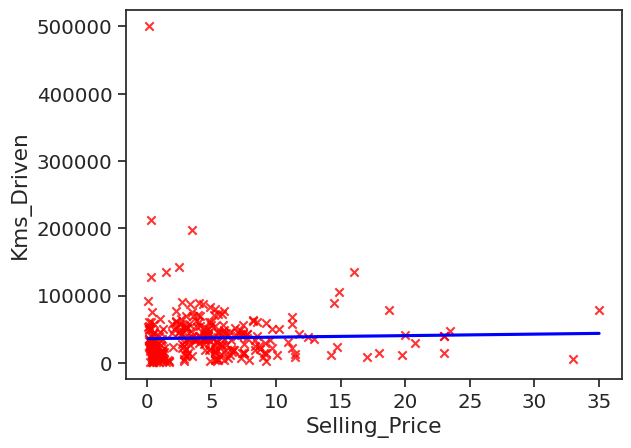

In [17]:
# linear correlation selling price and kms driven

sns.regplot(x='Selling_Price', y='Kms_Driven', data=df, marker='x', color='red', line_kws={'color': 'blue'}, ci=None)
plt.show()

# 5. Algorithmes de regression linéaire univariée

Utilisation de la librairie scikit-learn et SciPy

Coefficient:  [0.31520792]
Intercept:  -630.5464554692612
Mean squared error:  7.2024518833493145
Coefficient of determination:  -0.12042940128023627


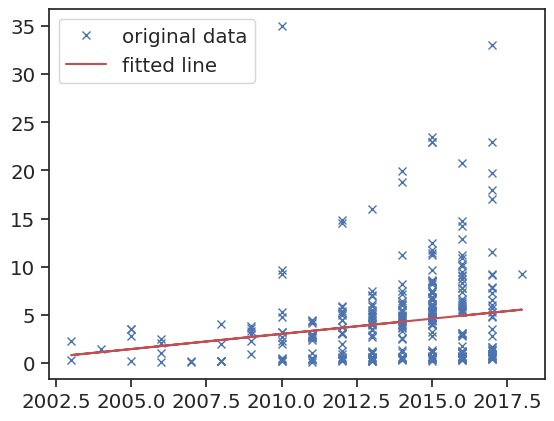

In [18]:
# linear regression
model = LinearRegression()
x = df[['Year']]
y = df['Selling_Price']

x_train = x[:-100]
x_test = x[-100:]

y_train = y[:-100]
y_test = y[-100:]

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# coefficient (values that multiply the predictor values (X) in the regression equation)
print('Coefficient: ', model.coef_)

# intercept (where the line crosses the y-axis)
print('Intercept: ', model.intercept_)

# mean squared error (the smaller the better, 0 is perfect prediction)
print('Mean squared error: ', sk.metrics.mean_squared_error(y_test, y_pred))

# coefficient of determination (1 is perfect prediction)
print('Coefficient of determination: ', sk.metrics.r2_score(y_test, y_pred))

# plot
intercept = model.intercept_
slope = model.coef_[0]
plt.plot(df['Year'], df['Selling_Price'], 'x', label='original data')
plt.plot(df['Year'], intercept + slope * df['Year'], 'r', label='fitted line')
plt.legend()

plt.show()

Slope:  0.4150916946355396
Intercept:  -831.1789245913283
R Value:  0.2361409801604273
P Value:  3.495472434809122e-05
Standard Error:  0.0987819729376285


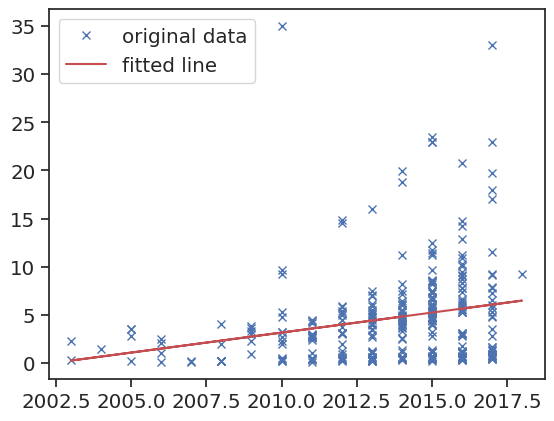

In [19]:
# linear regression
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df['Year'], df['Selling_Price'])

# slope (the slope of the line)
print('Slope: ', slope)
# intercept (where the line crosses the y-axis)
print('Intercept: ', intercept)
# r value (the correlation coefficient)
print('R Value: ', r_value)
# P(rediction) value (the smaller the better, 0 is perfect prediction)
print('P Value: ', p_value)
# standard error (the smaller the better, 0 is perfect prediction)
print('Standard Error: ', std_err)

# plot
plt.plot(df['Year'], df['Selling_Price'], 'x', label='original data')
plt.plot(df['Year'], intercept + slope * df['Year'], 'r', label='fitted line')
plt.legend()    
plt.show()


## 3. Chercher une voiture d'occasion en fonction de certains critères

Martin est à la recherche d'une voiture d'occasion, il cherche un véhicule de moins de 7 ans, avec un kilométrage inférieur à 100 000 km et une boite manuelle.

In [25]:
# now that we have a linear regression model, we can predict the selling price of a car based on the year, kms driven and transmission

# linear regression
model = LinearRegression()
df['Transmission_float'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})

# Year should be superior or equal to 2017
# Kms driven should be inferior or equal to 100000
# Transmission should be 0
x = df[['Year', 'Kms_Driven', 'Transmission_float']]
x = x[(df['Year'] >= 2017) & (df['Kms_Driven'] <= 100000) & (df['Transmission_float'] == 0)]

y = df['Selling_Price']


x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.2, random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# coefficient (values that multiply the predictor values (X) in the regression equation)
print('Coefficient: ', model.coef_)
# intercept (where the line crosses the y-axis)
print('Intercept: ', model.intercept_)
# mean squared error (the smaller the better, 0 is perfect prediction)
print('Mean squared error: ', sk.metrics.mean_squared_error(y_test, y_pred))
# coefficient of determination (1 is perfect prediction)
print('Coefficient of determination: ', sk.metrics.r2_score(y_test, y_pred))

# linear regression
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df['Year'], df['Selling_Price'])

# slope (the slope of the line)
print('Slope: ', slope)
# intercept (where the line crosses the y-axis)
print('Intercept: ', intercept)
# r value (the correlation coefficient)
print('R Value: ', r_value)
# P(rediction) value (the smaller the better, 0 is perfect prediction)
print('P Value: ', p_value)
# standard error (the smaller the better, 0 is perfect prediction)
print('Standard Error: ', std_err)

# plot
plt.plot(df['Year'], df['Selling_Price'], 'x', label='original data')
plt.plot(df['Year'], intercept + slope * df['Year'], 'r', label='fitted line')
plt.legend()
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required by LinearRegression.